## CodeClause Task1
##  Customer Churn Rate Analysis 

### Import the main Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Import the DataSet

In [4]:
# Load dataset 
df_churn = pd.read_csv("telecom_churn.csv")

In [5]:
# load the first 5 Rows
df_churn.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Exploratory Data Analysis

In [14]:
# Check shape of dataset
df_churn.shape

(3333, 20)

In [15]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [16]:
# Show some statistics about the Dataset
df_churn.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [17]:
# Check duplicated rows in dataset
df_churn.duplicated().sum()

0

In [18]:
# Check nulls in dataset
df_churn.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

Categories of (Churn): 
 False    2850
True      483
Name: Churn, dtype: int64


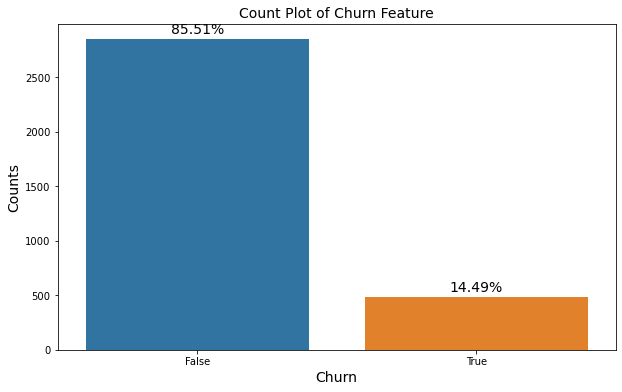

In [20]:
churn_values = df_churn['Churn'].value_counts()
print('Categories of (Churn): \n',churn_values)

plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', data=df_churn, order=churn_values.index)
plt.title('Count Plot of Churn Feature', fontsize=14, c='k')
plt.xlabel('Churn', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')

# Get percentage of each bar
for index in range(len(churn_values)):
    each_value = churn_values.values[index]
    each_percentage = f'{((each_value / len(df_churn)) * 100):.2f}%'
    plt.text(x=index, y=each_value + 50, s=each_percentage, c='k', fontsize=14, ha='center')

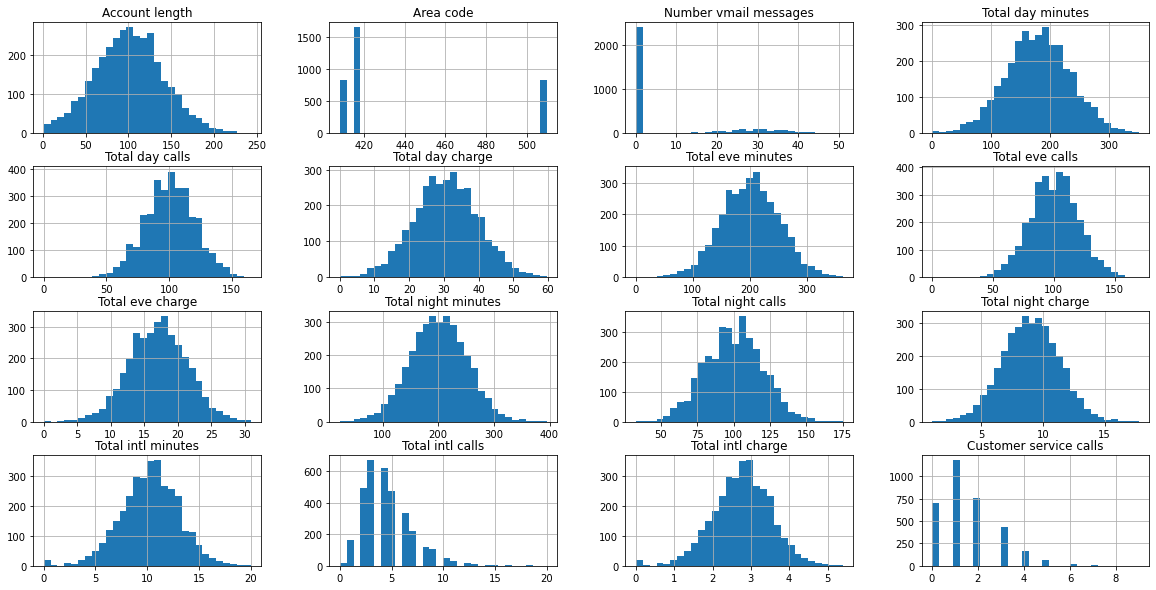

In [21]:
df_churn.hist(bins=30, figsize=(20, 10))
plt.show()

<AxesSubplot:xlabel='International plan', ylabel='count'>

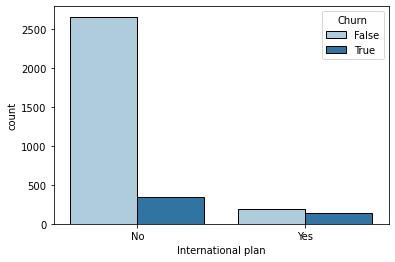

In [26]:
sns.countplot(x='International plan', hue="Churn", data=df_churn, palette="Paired", edgecolor = 'Black', order=df_churn['International plan'].value_counts().index)

<AxesSubplot:xlabel='Voice mail plan', ylabel='count'>

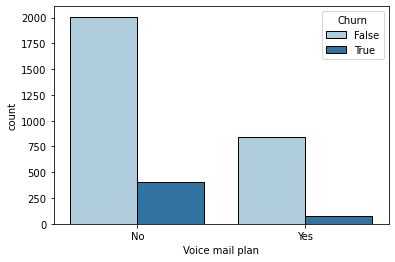

In [27]:
sns.countplot(x='Voice mail plan', hue="Churn", data=df_churn, palette="Paired", edgecolor = 'Black', order=df_churn['Voice mail plan'].value_counts().index)

In [33]:
df_churn.corr()[['Churn']].sort_values('Churn', ascending=False)

,Churn
Churn,1.000000
Customer service calls,0.208750
Total day minutes,0.205151
Total day charge,0.205151
Total eve minutes,0.092796
Total eve charge,0.092786
Total intl charge,0.068259
Total intl minutes,0.068239
Total night charge,0.035496
Total night minutes,0.035493


<AxesSubplot:>

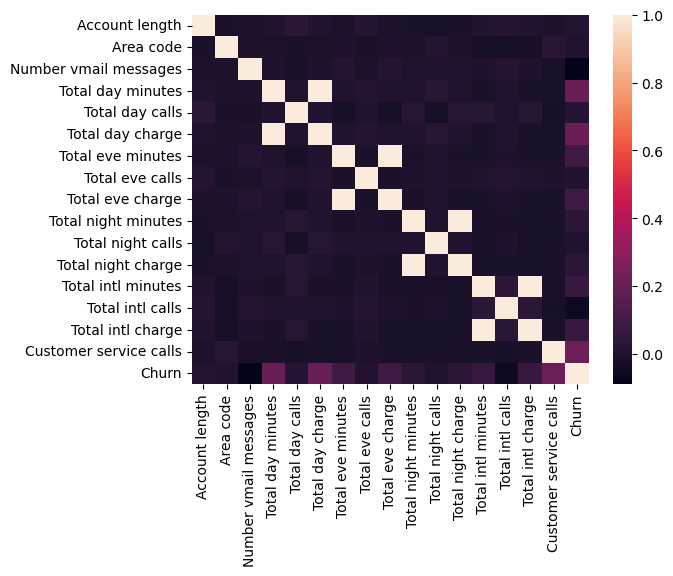

In [9]:
# show the Correlation
sns.heatmap(df_churn.corr())

In [45]:
df_churn['State']= df_churn['State'].astype('category')
df_churn['International plan']=df_churn['International plan'].astype('category')
df_churn['Voice mail plan']=df_churn['Voice mail plan'].astype('category')

In [44]:
df_churn.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

<AxesSubplot:xlabel='Area code'>

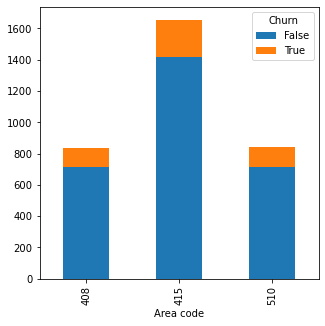

In [49]:
df_churn.groupby(["Area code", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

<AxesSubplot:xlabel='Customer service calls'>

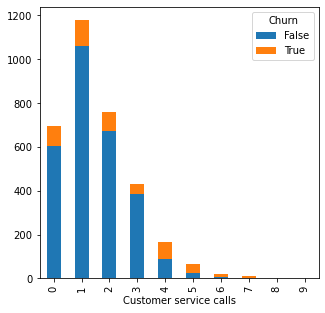

In [51]:
df_churn.groupby(["Customer service calls", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

(3333, 2) (3333,)
Counter({0: 1667, 1: 1666})
[-9.6453659  -3.90832214] 1
[-10.71531666  -4.06516221] 1
[-2.8793043   6.85585852] 0
[-1.93078862  6.26940296] 0
[-8.48489256 -4.72934306] 1
[-8.40686816 -4.71902944] 1
[-2.37798086  4.48096696] 0
[-10.16270712  -4.46029519] 1
[-10.31878965  -3.39254252] 1
[-1.23606555  4.48382994] 0


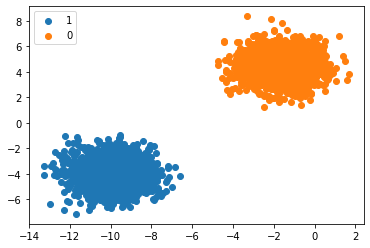

In [47]:
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs

# define dataset
X, y = make_blobs(n_samples=len(df_churn), centers=2, random_state=1)
# summarize dataset shape
print(X.shape, y.shape)
# summarize observations by class label
counter = Counter(y)
print(counter) 
for i in range(10):
    print(X[i], y[i])
# plot the dataset and color the by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()